In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from matplotlib.image import imread
import os
import datetime
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.cm as cm
import keras
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import MaxPool2D,MaxPooling2D,Flatten,Dense,Conv2D,AveragePooling2D,Activation,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from skimage.segmentation import mark_boundaries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [ ]:
classes = ['NORMAL', 'PNEUMONIA', 'COVID19']

class_dict={0:"NORMAL",
           1:"PNEUMONIA",
           2:"COVID19"}

change = {
'NORMAL' : '0',
'PNEUMONIA': '1',
'COVID19' : '2',
}

batch_size=32
epochs=150
image_w=224
image_h=224

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)


In [ ]:
#/content/drive/MyDrive/Colab Notebooks/Pneumonia diagnosis system/dataset/Data/train
train_folder = '../input/chest-xray-covid19-pneumonia/Data/train'
x, y = [],[]

for category in os.listdir(train_folder):
    for file in os.listdir(os.path.join(train_folder,category)):
        x.append(os.path.join(train_folder,category,file))
        y.append(category)  

train = pd.DataFrame({
    'paths_train':x,
    'class_train':y })

train.head(10)

paths_train class_train
0  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
1  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
2  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
3  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
4  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
5  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
6  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
7  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
8  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
9  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA

In [ ]:
train = shuffle(train, random_state=42)
train.reset_index(drop=True, inplace=True)
train.head(10)

paths_train class_train
0  ../input/chest-xray-covid19-pneumonia/Data/tra...     COVID19
1  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
2  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
3  ../input/chest-xray-covid19-pneumonia/Data/tra...      NORMAL
4  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
5  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
6  ../input/chest-xray-covid19-pneumonia/Data/tra...      NORMAL
7  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
8  ../input/chest-xray-covid19-pneumonia/Data/tra...   PNEUMONIA
9  ../input/chest-xray-covid19-pneumonia/Data/tra...     COVID19

In [ ]:
train['class_train'] = train['class_train'].map(change)
train

paths_train class_train
0     ../input/chest-xray-covid19-pneumonia/Data/tra...           2
1     ../input/chest-xray-covid19-pneumonia/Data/tra...           1
2     ../input/chest-xray-covid19-pneumonia/Data/tra...           1
3     ../input/chest-xray-covid19-pneumonia/Data/tra...           0
4     ../input/chest-xray-covid19-pneumonia/Data/tra...           1
...                                                 ...         ...
5139  ../input/chest-xray-covid19-pneumonia/Data/tra...           0
5140  ../input/chest-xray-covid19-pneumonia/Data/tra...           1
5141  ../input/chest-xray-covid19-pneumonia/Data/tra...           1
5142  ../input/chest-xray-covid19-pneumonia/Data/tra...           0
5143  ../input/chest-xray-covid19-pneumonia/Data/tra...           1

[5144 rows x 2 columns]

In [ ]:
test_folder = '../input/chest-xray-covid19-pneumonia/Data/test'
x2, y2 = [],[]

for category in os.listdir(test_folder):
    for file in os.listdir(os.path.join(test_folder,category)):
        x2.append(os.path.join(test_folder,category,file))
        y2.append(category)  

test = pd.DataFrame({
    'paths_test':x2,
    'class_test':y2 })

test.head()

paths_test class_test
0  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA
1  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA
2  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA
3  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA
4  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA

In [ ]:
test = shuffle(test, random_state=42)
test.reset_index(drop=True, inplace=True)
test.head()

paths_test class_test
0  ../input/chest-xray-covid19-pneumonia/Data/tes...     NORMAL
1  ../input/chest-xray-covid19-pneumonia/Data/tes...    COVID19
2  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA
3  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA
4  ../input/chest-xray-covid19-pneumonia/Data/tes...  PNEUMONIA

In [ ]:
test['class_test'] = test['class_test'].map(change)
test.head()

paths_test class_test
0  ../input/chest-xray-covid19-pneumonia/Data/tes...          0
1  ../input/chest-xray-covid19-pneumonia/Data/tes...          2
2  ../input/chest-xray-covid19-pneumonia/Data/tes...          1
3  ../input/chest-xray-covid19-pneumonia/Data/tes...          1
4  ../input/chest-xray-covid19-pneumonia/Data/tes...          1

In [ ]:
train, val = train_test_split(train, test_size=0.1, random_state=0, stratify=train['class_train'])
print(train['class_train'].value_counts(dropna=False))
print(val['class_train'].value_counts(dropna=False))

1    3076
0    1139
2     414
Name: class_train, dtype: int64
1    342
0    127
2     46
Name: class_train, dtype: int64


In [ ]:
val.head()

paths_train class_train
3050  ../input/chest-xray-covid19-pneumonia/Data/tra...           0
2183  ../input/chest-xray-covid19-pneumonia/Data/tra...           0
341   ../input/chest-xray-covid19-pneumonia/Data/tra...           0
1995  ../input/chest-xray-covid19-pneumonia/Data/tra...           0
836   ../input/chest-xray-covid19-pneumonia/Data/tra...           0

In [ ]:
datagen = ImageDataGenerator(
                                rescale = 1./255,
                                rotation_range=15,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1,
                                zoom_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True,
                                vertical_flip=False, 
                            )


test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = datagen.flow_from_dataframe(train,
                                        x_col="paths_train",
                                        y_col="class_train",
                                        target_size=(image_w,image_h),
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=True,
                                        num_parallel_calls=AUTOTUNE)


val_data = test_datagen.flow_from_dataframe(val,
                                        x_col="paths_train",
                                        y_col="class_train",
                                        target_size=(image_w,image_h),
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=False,
                                        num_parallel_calls=AUTOTUNE)


test_data = test_datagen.flow_from_dataframe(test,
                                        x_col="paths_test",
                                        y_col="class_test",
                                        target_size=(image_w,image_h),
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=False,
                                        num_parallel_calls=AUTOTUNE)

Found 4629 validated image filenames belonging to 3 classes.
Found 515 validated image filenames belonging to 3 classes.
Found 1288 validated image filenames belonging to 3 classes.


In [ ]:
pretrained_densenet = tf.keras.applications.DenseNet201(input_shape=(image_w, image_h, 3), weights='imagenet', include_top=False)

for layer in pretrained_densenet.layers:
    layer.trainable = False

x = pretrained_densenet.output
x = AveragePooling2D(name="averagepooling2d")(x)
x = Flatten(name="flatten")(x)
x = Dense(512, activation="relu", name="dense_0")(x)
x = Dropout(0.15, name="dropout_0")(x)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="output")(x)

model = Model(inputs=pretrained_densenet.input, outputs=model_out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

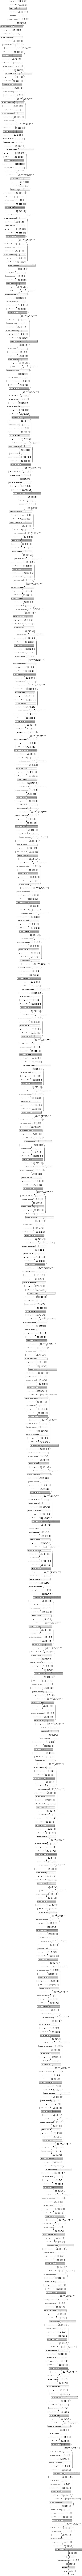

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", patience=12, mode="min")

checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=1, 
                             save_best_only=True, save_weights_only=True, mode="min")

learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, verbose=1, mode="min")

In [ ]:
train_steps = train_data.samples // batch_size
valid_steps = val_data.samples // batch_size
print(train_steps)
print(valid_steps)

144
16


In [ ]:
init_time = datetime.datetime.now()

history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=batch_size,
    epochs=epochs,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint, 
                early_stopping, 
                learning_rate_reduction],
    verbose=1,
    )

requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

2023-02-01 16:02:10.993615: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2023-02-01 16:02:23.434143: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


144/144 [==============================] - 248s 2s/step - loss: 0.5576 - accuracy: 0.8954 - val_loss: 0.2790 - val_accuracy: 0.8906

Epoch 00001: val_loss improved from inf to 0.27896, saving model to loss-0.2790.h5
Epoch 2/150
144/144 [==============================] - 175s 1s/step - loss: 0.1662 - accuracy: 0.9408 - val_loss: 0.2416 - val_accuracy: 0.9023

Epoch 00002: val_loss improved from 0.27896 to 0.24156, saving model to loss-0.2416.h5
Epoch 3/150
144/144 [==============================] - 175s 1s/step - loss: 0.1365 - accuracy: 0.9511 - val_loss: 0.3058 - val_accuracy: 0.8789

Epoch 00003: val_loss did not improve from 0.24156
Epoch 4/150
144/144 [==============================] - 174s 1s/step - loss: 0.1400 - accuracy: 0.9467 - val_loss: 0.2041 - val_accuracy: 0.9355

Epoch 00004: val_loss improved from 0.24156 to 0.20408, saving model to loss-0.2041.h5
Epoch 5/150
144/144 [==============================] - 174s 1s/step - loss: 0.1217 - accuracy: 0.9532 - val_loss: 0.1795 - v

In [ ]:
history_df = pd.DataFrame(history.history)
min_loss=history_df['val_loss'].min()
print("Minimum Validation Loss: {:0.4f}".format(min_loss));

Minimum Validation Loss: 0.1795


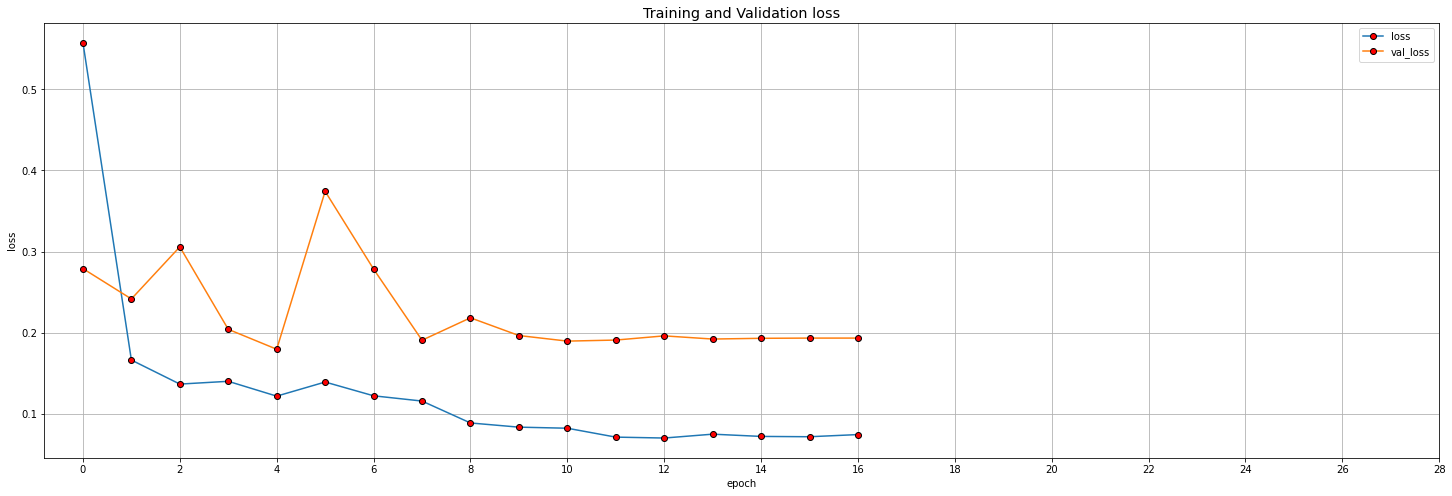

In [ ]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize =(25,8), marker = "o", mfc = "r")
plt.style.use('classic')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 30, 2))
plt.show()

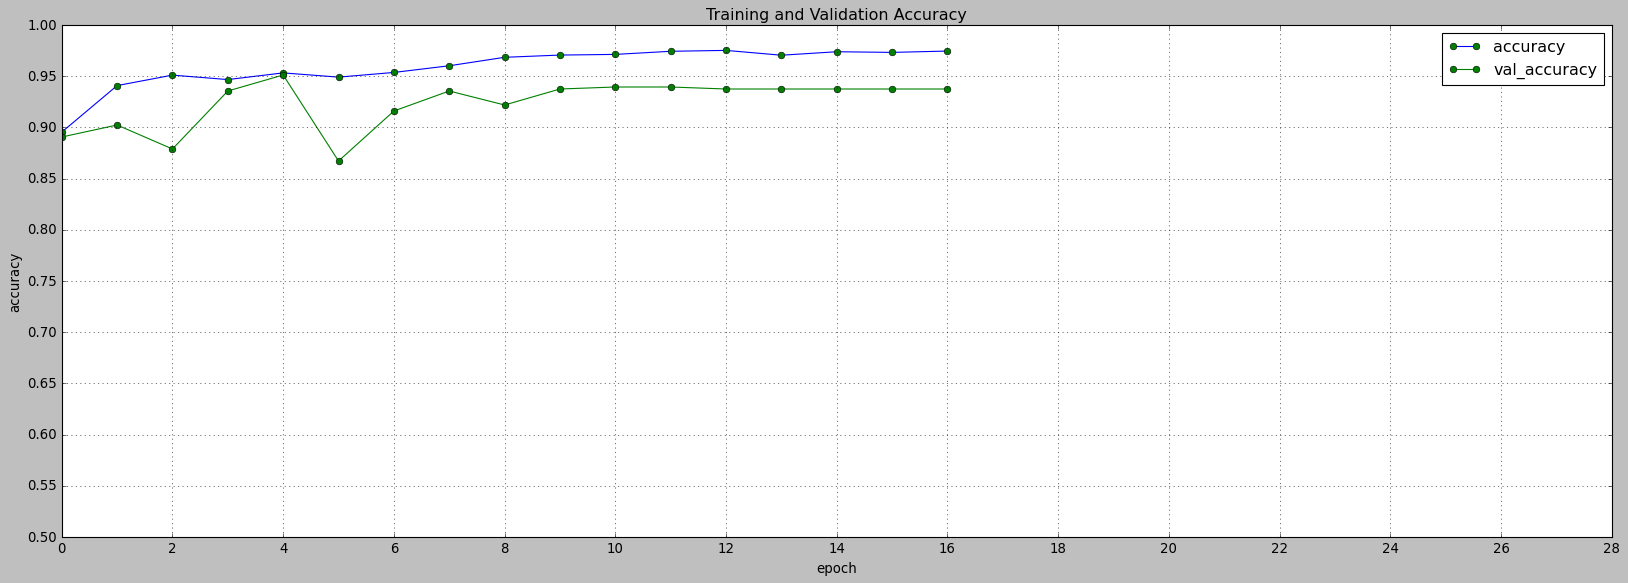

In [ ]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(figsize =(25,8), marker = "o", mfc = "g")

plt.style.use('classic')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 30, 2))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [ ]:
model.load_weights('loss-{:0.4f}.h5'.format(min_loss))

test_steps = test_data.samples // batch_size

test_loss, test_acc = model.evaluate(test_data,steps=test_steps)

print('\naccuracy: {}%'.format(round(test_acc*100,2)), '\nloss: {:0.4f}'.format(test_loss))


40/40 [==============================] - 43s 1s/step - loss: 0.1617 - accuracy: 0.9438

accuracy: 94.38% 
loss: 0.1617


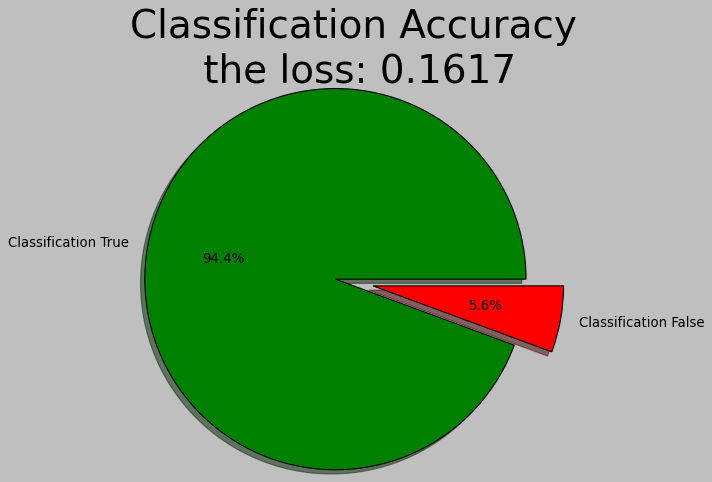

In [ ]:
plt.style.use('classic')
plt.pie([test_acc,1-test_acc],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title('Classification Accuracy\n the loss: {:0.4f}'.format(test_loss),fontsize=35)
plt.show()

In [ ]:
model.save('resnet50.h5')

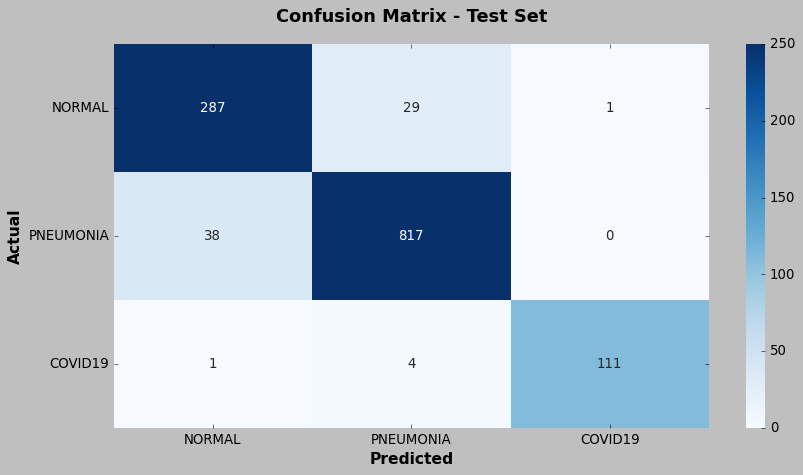

In [ ]:
y_pred=model.predict(test_data)
predictions=np.array(list(map(lambda x:np.argmax(x),y_pred)))
y_true=test_data.classes
CMatrix=pd.DataFrame(confusion_matrix(y_true,predictions),columns=classes,index=classes)
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
def find_true_class(file_path):
    true_class = None
    if 'COVID19' in file_path:
        true_class = 'COVID19'
    elif 'PNEUMONIA' in file_path:
        true_class = 'PNEUMONIA'
    elif 'NORMAL' in file_path:
        true_class = 'NORMAL'
    return true_class


# https://keras.io/examples/vision/grad_cam/
from tensorflow import keras

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, top_pred_index.numpy()


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, top_pred_index.numpy()



# https://keras.io/examples/vision/grad_cam/
def superimposed_img(img, heatmap,pred_class,pred_prob_final):

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM

    plt.matshow(superimposed_img)

    plt.xticks([])
    plt.yticks([])

    plt.title('Predict: '+str(pred_class)+'\n Confidence: '+str(pred_prob_final)+"%",fontsize=25, weight='bold');

    plt.show()


# label smoothing https://www.linkedin.com/pulse/label-smoothing-solving-overfitting-overconfidence-code-sobh-phd/
def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
last_conv_layer_name = "conv5_block32_concat"
classifier_layer_names = [
    'bn',
    'relu',
    "averagepooling2d",
    'flatten',
    'dense_0',  
    "dropout_0"
]

In [ ]:
def img_rgb(img_test_path):

    test_image=cv2.imread(img_test_path,cv2.IMREAD_COLOR)
    test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    test_image=cv2.resize(test_image,(224,224))
    
    return test_image 


def imshow(img_test_path):
    
    img_test_list=list(img_test_path.split('/'))
    test_image=img_rgb(img_test_path)
    plt.xticks([])
    plt.yticks([])
    plt.title('the Actual Class: :{}'.format(img_test_list[-2]),fontsize=25)
    plt.imshow(test_image)
    plt.show()
    

    
def show_visual_img(img_test_path):
    
    test_image=img_rgb(img_test_path)
    
    test_image=np.expand_dims(test_image,axis=0)
    
    img=img_rgb(img_test_path)
    
    img=np.expand_dims(img,axis=0)

    img=img/255.0
    
    score = model.predict(img)


    pred_class_num=np.argmax(score)
#     print(pred_class_num)
    pred_class=class_dict[pred_class_num]
#     print(pred_class)

    pred_prob=np.max(score) * 100
#     print(pred_prob)
    pred_prob_final=round(pred_prob,2)

    heatmap, top_index = make_gradcam_heatmap(test_image, 
                                              model, 
                                              last_conv_layer_name, 
                                              classifier_layer_names)

    superimposed_img(test_image[0], heatmap,pred_class,pred_prob_final)

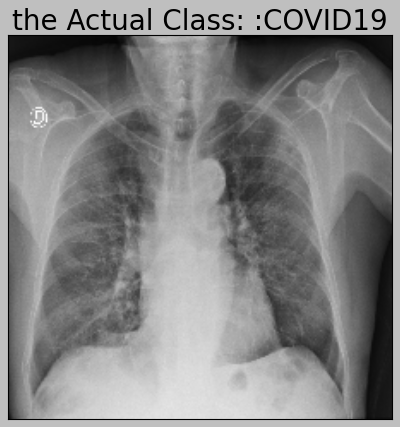

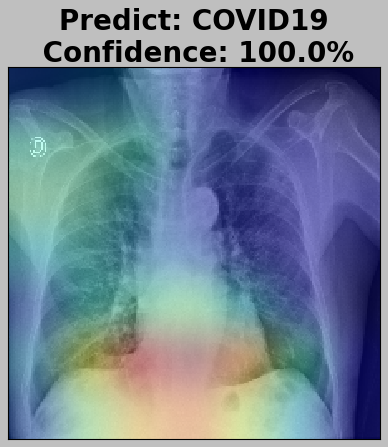

In [ ]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19/COVID19(485).jpg'
imshow(img_test_path)
show_visual_img(img_test_path)

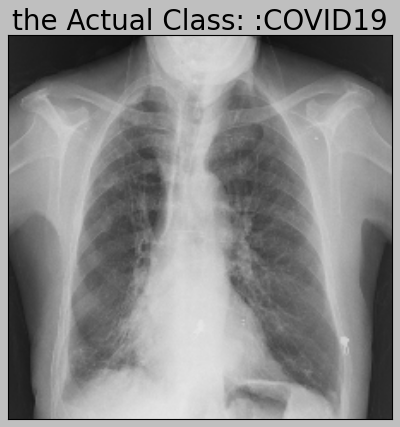

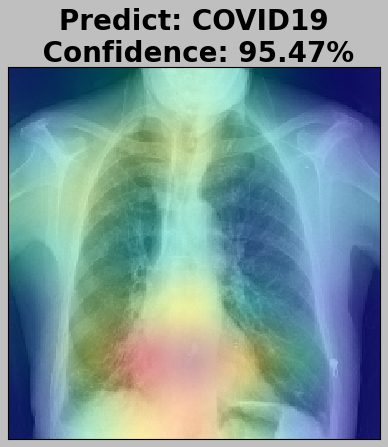

In [ ]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19/COVID19(490).jpg'
imshow(img_test_path)
show_visual_img(img_test_path)

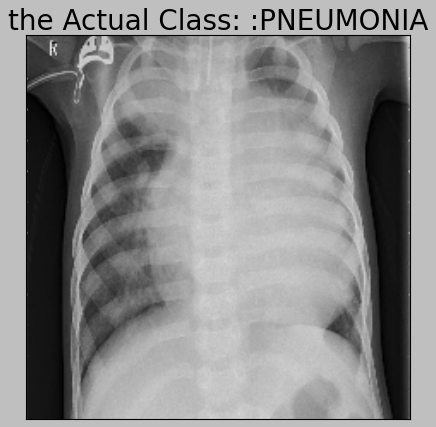

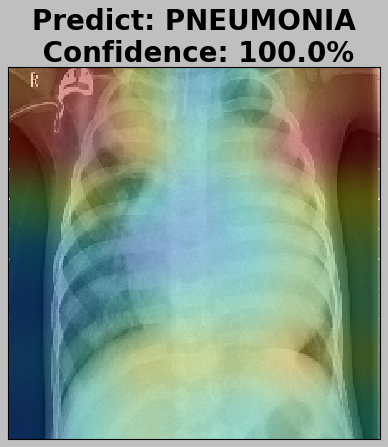

In [ ]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3422).jpg'
imshow(img_test_path)
show_visual_img(img_test_path)

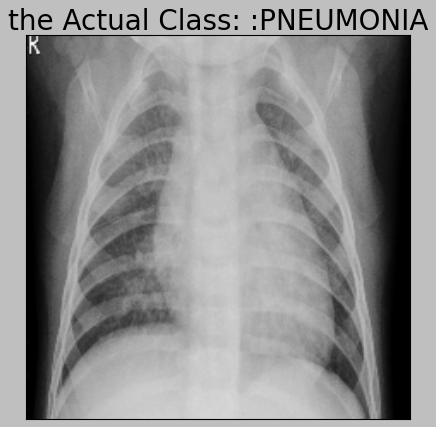

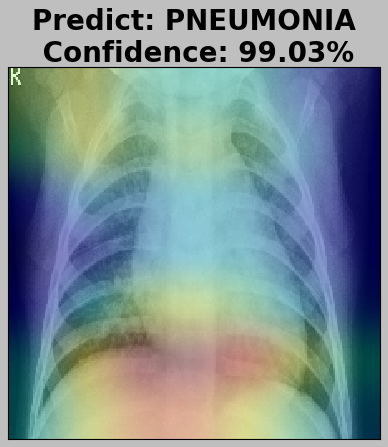

In [ ]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3430).jpg'
imshow(img_test_path)
show_visual_img(img_test_path)

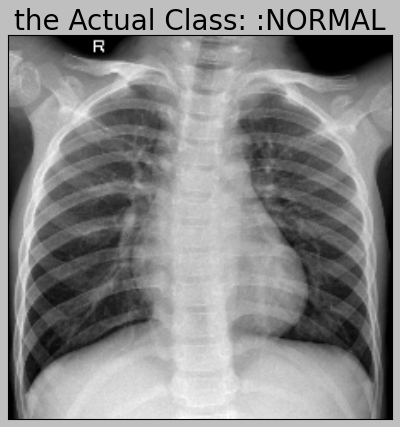

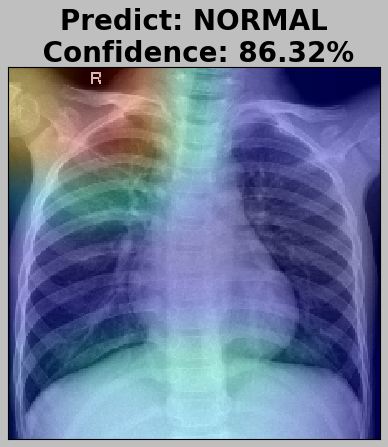

In [ ]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1266).jpg'
imshow(img_test_path)
show_visual_img(img_test_path)

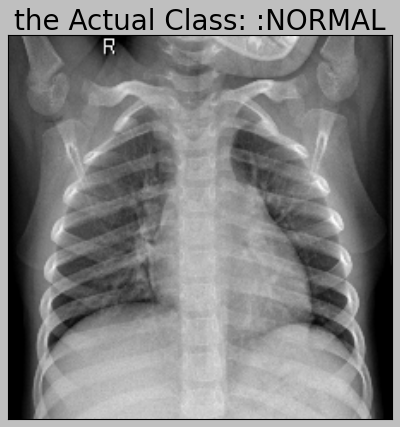

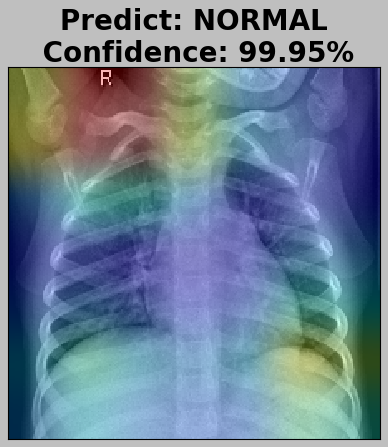

In [ ]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1275).jpg'
imshow(img_test_path)
show_visual_img(img_test_path)